In [1]:
import matplotlib.pyplot as plt
import numpy as np
from rasterio import plot
import pandas as pd
import sys
import os
#import earthpy.plot as ep
import gdal
import shapefile


import fiona, rasterio
import geopandas as gpd
import rasterio.plot as rplt
from rasterio.features import rasterize
from rasterstats import zonal_stats

# import rasterio as rio
# from rasterio.plot import show
# from rasterio.mask import mask
# from shapely.geometry import mapping
# import geopandas as gpd
# import earthpy as et
# import earthpy.spatial as es

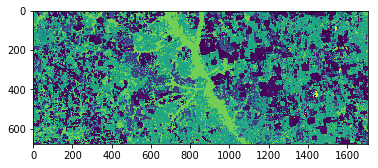

[  0   1   2   4   5  10  24  26  27  28  29  36  37  48  53  54  57  58
  59  61  69  74 111 121 122 123 124 131 141 142 143 152 176 190 195 209
 221 222 226 236 238 241]


In [2]:
data_folder_path = '/home/chris/Desktop/diploma/Arable Land Detection/Florida Dataset/Data/'
labels_folder_path = '/home/chris/Desktop/diploma/Arable Land Detection/Florida Dataset/Ground_Truth_Data/'

tif_path = labels_folder_path + 'CDL.tif'

crop_data_tif = gdal.Open(labels_folder_path + 'CDL.tif')
crop_data = np.array(crop_data_tif.GetRasterBand(1).ReadAsArray())
plot.show(crop_data)
print(np.unique(crop_data))

In [3]:
output_file = data_folder_path +'cotton_shapefile.shp'
print(output_file)
print(tif_path)

/home/chris/Desktop/diploma/Arable Land Detection/Florida Dataset/Data/cotton_shapefile.shp
/home/chris/Desktop/diploma/Arable Land Detection/Florida Dataset/Ground_Truth_Data/CDL.tif


In [4]:
sf = shapefile.Reader(output_file)
print(sf)
print(crop_data_tif)
print(tif_path)
print(output_file)

shapefile Reader
    75 shapes (type 'POLYGON')
    75 records (2 fields)
<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x7f20540e4450> >
/home/chris/Desktop/diploma/Arable Land Detection/Florida Dataset/Ground_Truth_Data/CDL.tif
/home/chris/Desktop/diploma/Arable Land Detection/Florida Dataset/Data/cotton_shapefile.shp


In [5]:
shapes = sf.shapes()
print(len(shapes))
print(['%.3f' % coord for coord in shapes[0].bbox])

for name in dir(shapes[0]):
    if not name.startswith('_'):
        print(name)
        
#shapeType: an integer representing the type of shape as defined by the shapefile specification
#shapeTypeName: a string representation of the type of shape as defined by shapeType. Read-only.
#bbox: If the shape type contains multiple points this tuple describes the lower left (x,y) coordinate and upper right corner coordinate creating a complete box around the points. If the shapeType is a Null (shapeType == 0) then an AttributeError is raised.
#parts: Parts simply group collections of points into shapes. If the shape record has multiple parts this attribute contains the index of the first point of each part. If there is only one part then a list containing 0 is returned.
#points: The points attribute contains a list of tuples containing an (x,y) coordinate for each point in the shape.

75
['1032615.000', '934035.000', '1034085.000', '934875.000']
bbox
parts
points
shapeType
shapeTypeName


In [6]:
# if you need to do more than just type or bounds checking,
#you may want to convert the geometry to the more human-readable
#GeoJSON format, where lines and polygons are grouped for you:
s = sf.shape(0)
geoj = s.__geo_interface__
geoj['type']

'Polygon'

In [7]:
fields = sf.fields
records = sf.records()
dct = records[0].as_dict()

In [8]:
print(fields)
print(type(records[0][0]))
sorted(dct.items())
print(records[0].oid)

[('DeletionFlag', 'C', 1, 0), ['Area', 'N', 24, 15]]
<class 'float'>
0


In [9]:
import rasterstats as rs

In [10]:
stats = rs.zonal_stats(output_file, tif_path, stats=rs.utils.VALID_STATS, nodata=-9999)
summed_file_path = data_folder_path + 'summed_map_shapefile.shp'
summed_stats = rs.zonal_stats(summed_file_path, tif_path,  stats="count min mean max median", nodata=-9999)

In [11]:
print((stats))

[{'min': 1.0, 'max': 152.0, 'mean': 4.274760383386582, 'count': 939, 'sum': 4014.0, 'std': 13.938978217949666, 'median': 2.0, 'majority': 2.0, 'minority': 1.0, 'unique': 8, 'range': 151.0, 'nodata': 0.0, 'nan': 0}, {'min': 2.0, 'max': 2.0, 'mean': 2.0, 'count': 728, 'sum': 1456.0, 'std': 0.0, 'median': 2.0, 'majority': 2.0, 'minority': 2.0, 'unique': 1, 'range': 0.0, 'nodata': 0.0, 'nan': 0}, {'min': 2.0, 'max': 61.0, 'mean': 2.232894736842105, 'count': 760, 'sum': 1697.0, 'std': 3.6995336888904604, 'median': 2.0, 'majority': 2.0, 'minority': 61.0, 'unique': 2, 'range': 59.0, 'nodata': 0.0, 'nan': 0}, {'min': 2.0, 'max': 61.0, 'mean': 2.1338709677419354, 'count': 620, 'sum': 1323.0, 'std': 2.4302823112517062, 'median': 2.0, 'majority': 2.0, 'minority': 61.0, 'unique': 3, 'range': 59.0, 'nodata': 0.0, 'nan': 0}, {'min': 2.0, 'max': 190.0, 'mean': 7.159395973154362, 'count': 596, 'sum': 4267.0, 'std': 23.08518865432166, 'median': 2.0, 'majority': 2.0, 'minority': 123.0, 'unique': 10, 'ra

In [20]:
print((summed_stats))

[{'min': 2.0, 'max': 152.0, 'mean': 68.0909090909091, 'count': 11, 'median': 61.0}, {'min': 1.0, 'max': 241.0, 'mean': 1.5016077170418007, 'count': 622, 'median': 1.0}, {'min': 1.0, 'max': 152.0, 'mean': 4.274760383386582, 'count': 939, 'median': 2.0}, {'min': 2.0, 'max': 190.0, 'mean': 15.583606557377049, 'count': 610, 'median': 10.0}, {'min': 2.0, 'max': 10.0, 'mean': 9.933747412008282, 'count': 483, 'median': 10.0}, {'min': 121.0, 'max': 121.0, 'mean': 121.0, 'count': 1, 'median': 121.0}, {'min': 2.0, 'max': 2.0, 'mean': 2.0, 'count': 728, 'median': 2.0}, {'min': 2.0, 'max': 10.0, 'mean': 9.893967093235831, 'count': 547, 'median': 10.0}, {'min': 2.0, 'max': 61.0, 'mean': 2.232894736842105, 'count': 760, 'median': 2.0}, {'min': 10.0, 'max': 152.0, 'mean': 11.455344070278185, 'count': 683, 'median': 10.0}, {'min': 2.0, 'max': 10.0, 'mean': 9.97283531409168, 'count': 589, 'median': 10.0}, {'min': 2.0, 'max': 10.0, 'mean': 9.943253467843633, 'count': 793, 'median': 10.0}, {'min': 10.0, 

In [12]:
import csv
toCSV = summed_stats
keys = toCSV[0].keys()
# print(keys)
with open('summed_stats.csv', 'w') as output_file:
    dict_writer = csv.DictWriter(output_file, keys)
    dict_writer.writeheader()
    dict_writer.writerows(toCSV)

In [13]:
toCSV = stats
keys = toCSV[0].keys()
# print(keys)
with open('people.csv', 'w') as output_file:
    dict_writer = csv.DictWriter(output_file, keys)
    dict_writer.writeheader()
    dict_writer.writerows(toCSV)

In [ ]:
# def output_ogr_from_2darray(array_2D,raster_NoDataValue,geotransformation,classes,classes_attributes,outputh_file):
#     """
#     Convert an input 2D numpy array to shapefile, merging all pixels with the same value.
 
#     @author: damo_ma
#     """
#     ##########################################################################
#     # create 1 bands in raster file in Memory
    
#     from osgeo import gdal
#     from osgeo import ogr
#     from osgeo import osr
#     import os
   
#     print (20*'=')
#     # create a Raster Layer in memory
#     driver = gdal.GetDriverByName( 'MEM' )
#     # see : GDALDataType > http://www.gdal.org/gdal_8h.html#a22e22ce0a55036a96f652765793fb7a4 
#     gdal_datasource = driver.Create( '',array_2D.shape[1], array_2D.shape[0], 1, gdal.GDT_Byte) # GDT_Byte : Eight bit unsigned integer
#     gdal_datasource.SetGeoTransform(geotransformation)

#     # set Spatial Reference System
#     srs = osr.SpatialReference() # import srs
#     srs.ImportFromEPSG(4326) #use the WGS04 in lat/long
#     print ('Spatial Reference System : \n',srs.ExportToPrettyWkt())
#     print (10*'=')
#     # here ImportFromProj4 could be used!
#     # spatialReference.ImportFromProj4('+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs')
#     gdal_datasource.SetProjection( srs.ExportToWkt() ) # set the data source srs

#     # get the 1st raster band, starting from 1, see http://www.gdal.org/classGDALDataset.html#ad96adcf07f2979ad176e37a7f8638fb6
#     raster_band = gdal_datasource.GetRasterBand(1) 
#     raster_band.SetNoDataValue(raster_NoDataValue) # set the NoDataValues 
#     raster_band.WriteArray(array_2D)
#     print ('Create a Raster Layer of %sx%s points in Memory' % (array_2D.shape))
#     print (10*'=')
    
#     ##########################################################################
#     # create a Vector Layer in memory
#     drv = ogr.GetDriverByName( 'Memory' )
#     ogr_datasource = drv.CreateDataSource( 'out' ) 
 
#     # create a new layer to accept the ogr.wkbPolygon from gdal.Polygonize
#     input_layer     = ogr_datasource.CreateLayer('polygonized', srs, ogr.wkbPolygon )
 
#     # add a field to put the classes in
#     # see OGRFieldType > http://www.gdal.org/ogr/ogr__core_8h.html#a787194bea637faf12d61643124a7c9fc
#     field_defn = ogr.FieldDefn('class', ogr.OFTInteger) # OFTInteger : Simple 32bit integer
#     input_layer.CreateField(field_defn) # add the field to the layer
 
#     # create "vector polygons for all connected regions of pixels in the raster sharing a common pixel value"
#     # see documentation : www.gdal.org/gdal_polygonize.html
#     gdal.Polygonize( raster_band, raster_band.GetMaskBand(), input_layer,  0) 

#     print ('Create a Vector Layer of %s Features in Memory' % (input_layer.GetFeatureCount()))
#     print (10*'=')
#     ##########################################################################
#     # create 1 bands in raster file
 
#     layerDefinition = input_layer.GetLayerDefn()
 
#     driver = ogr.GetDriverByName("ESRI Shapefile")
 
#     # select the field name to use for merge the polygon from the first and unique field in input_layer
#     field_name = layerDefinition.GetFieldDefn(0).GetName()
#     print ('Joing classification based on values in field "%s"' % field_name)
#     print (10*'=')
#     # Remove output shapefile if it already exists
#     if os.path.exists(outputh_file):
#         driver.DeleteDataSource(outputh_file)
#     out_datasource = driver.CreateDataSource( outputh_file )
#     # create a new layer with wkbMultiPolygon, Spatial Reference as middle OGR file = input_layer
#     multi_layer = out_datasource.CreateLayer("merged", input_layer.GetSpatialRef(), ogr.wkbMultiPolygon)
#     print ('Create output file in %s' % outputh_file)
#     print (10*'=')
#     # Add the fields we're interested in 
#     field_field_name = ogr.FieldDefn(field_name, ogr.OFTInteger) # add a Field named field_name = class
#     multi_layer.CreateField(field_field_name)
#     for attributes_name in classes_attributes['names']:
#         print (' Set feature "%s" in output file' % attributes_name)
#         # iteratively define a new file from classes_attributes
#         field_defn = ogr.FieldDefn(attributes_name, ogr.OFTReal) # make the type matching input type?
#         # field_defn.SetWidth = len(attributes_name) # unusfeul : driver "ESRI Shapefile" limit field name to 10 characters!
#         # add new file to actual layer
#         multi_layer.CreateField(field_defn)
   
#     # print out the field name defined
#     multylayerDefinition = multi_layer.GetLayerDefn()
#     print (10*'=' )

#     for i in classes:
#         # select the features in the middle OGR file with field_name == i
#         input_layer.SetAttributeFilter("%s = %s" % (field_name,i))
#         print ('Field %s == %s : %s features ' % (field_name,i,input_layer.GetFeatureCount()))

#        # # create a new layer with wkbMultiPolygon : each new layer is a new shp file, se this to create separated file for each class
#        # multi_layer = out_datasource.CreateLayer("class %s"  % i, input_layer.GetSpatialRef(), ogr.wkbMultiPolygon) # add a Layer
#        # To Do : add field definiton for each layer 

#         multi_feature = ogr.Feature(multi_layer.GetLayerDefn()) # generate a feature
#         multipolygon  = ogr.Geometry(ogr.wkbMultiPolygon) # generate a polygon based on layer unique Geometry definition
#         for feature in input_layer:
#             multipolygon.AddGeometry(feature.geometry()) #aggregate all the input geometry sharing the class value i
#         multi_feature.SetGeometry(multipolygon) # add the merged geoemtry to the current feature
#         multi_feature.SetField(field_name, i) # set the field of the current feature
#         # set all the field
#         for k in range(len(classes_attributes[i])):
#             multi_feature.SetField(classes_attributes['names'][k],classes_attributes[i][k]) # set the field of the current feature
#         multi_layer.CreateFeature(multi_feature) # add the current feature to the layer
#         multi_feature.Destroy() # desrtroy the current feature

#     gdal_datasource = None
#     ogr_datasource  = None
#     out_datasource  = None
#     print (20*'=')



In [ ]:
# # class 0 represent No Data, so we have 3-1 = 2 classes
# classes = np.unique(summed_map)[1:]

# attributes_n = 2

# attributes_values = np.random.random_sample((len(classes),attributes_n))
# print((attributes_values.shape))
# # Re-Define NaN as -1, classes normaly span [0,N] 
# NoDataValue = -9999

# plot_matrix[np.isfinite(plot_matrix) == 0] = NoDataValue
# plot_matrix = plot_matrix.astype('int8') # cast to 8 bit int, it works up to 254 classes

# # assign classes attributes names
# # Important : Driver "ESRI Shapefile" limit field name to 10 characters!!
# classes_attributes = { 'names' : ['attr_'+str(i) for i in range(attributes_n)]}

# # assign classes attributes values
# for i in range(classes.size):
#     classes_attributes[classes[i]] = attributes_values[i,:]
    
# # Some Fake Raster georereference
# img_extent = (-180, 180, -90, 90)
# xmin,xmax,ymin,ymax = img_extent
# nrows,ncols = plot_matrix.shape
# xres=(xmax-xmin)/float(ncols)
# yres=(ymax-ymin)/float(nrows)
# geotransform = (xmin,xres,0,ymax,0, -yres)

# out_path = data_folder_path
# output_file = out_path+'GDAL_test.shp'

# output_ogr_from_2darray(summed_map,NoDataValue,geotransform,classes,classes_attributes,output_file)

